In [ ]:
# Run GSEA on Adagrasib based on the top 1000 genes in feature_importance 
# feature_importance is the output from Augur

In [3]:
import pandas as pd

# Path to your specific adagrasib file
adagrasib_file = "/home/ubuntu/frameshift-1/carlota/augur_allcellines/feature_importances_plate9_Adagrasib.csv"

# Load
df = pd.read_csv(adagrasib_file)

In [7]:
# Sort by importance if needed
df = df.sort_values(by="feature_importances", ascending=False)

In [45]:
ranked_genes1000 = df.set_index("genes")["feature_importances"].head(1000)

import gseapy as gp

# Run pre-ranked GSEA
pre_res = gp.prerank(
    rnk=ranked_genes1000,
    gene_sets='MSigDB_Oncogenic_Signatures',
    outdir='gsea_adagrasib_results',
    min_size=15,
    max_size=500,
    permutation_num=100  # reduce for faster test runs
)

# View top results
print(pre_res.res2d.head())

      Name                           Term        ES       NES NOM p-val  \
0  prerank                   RAF UP.V1 UP  0.502252  2.481315       0.0   
1  prerank                      NFE2L2.V2  0.467741  2.121612  0.014925   
2  prerank                     TBK1.DF DN  0.437526  2.104351       0.0   
3  prerank                  CAMP UP.V1 DN  0.344729  1.992728  0.013333   
4  prerank  KRAS.600.LUNG.BREAST UP.V1 UP  0.433024  1.794743       0.0   

  FDR q-val FWER p-val  Tag %  Gene %  \
0       0.0        0.0  16/22  28.00%   
1   0.01487       0.02  11/16  26.50%   
2  0.009913       0.02  13/18  33.10%   
3  0.022305       0.06  10/29   8.50%   
4  0.065428       0.15  11/15  35.90%   

                                          Lead_genes  
0  ARHGAP26;SYNE2;MPZL2;ABCC3;ASPH;FAM13A;PDE4D;P...  
1  IGFBP3;PALLD;HDAC9;SPP1;TFRC;FTH1;MMP7;NAV2;GC...  
2  ATP2B1;EXPH5;COL5A2;KLF7;RLF;ALDH3A1;SERPINE2;...  
3  CELF2;ATP2B1;UBE2E2;BIRC3;CALM1;DST;CLK1;PALLD...  
4  PPP1R15A;BIRC3;IGFBP3;ST

Significant pathways (FDR q-value < 0.05, q ≠ 0):
            Term       NES FDR q-val
0   RAF UP.V1 UP  2.481315       0.0
2     TBK1.DF DN  2.104351  0.009913
1      NFE2L2.V2  2.121612   0.01487
3  CAMP UP.V1 DN  1.992728  0.022305


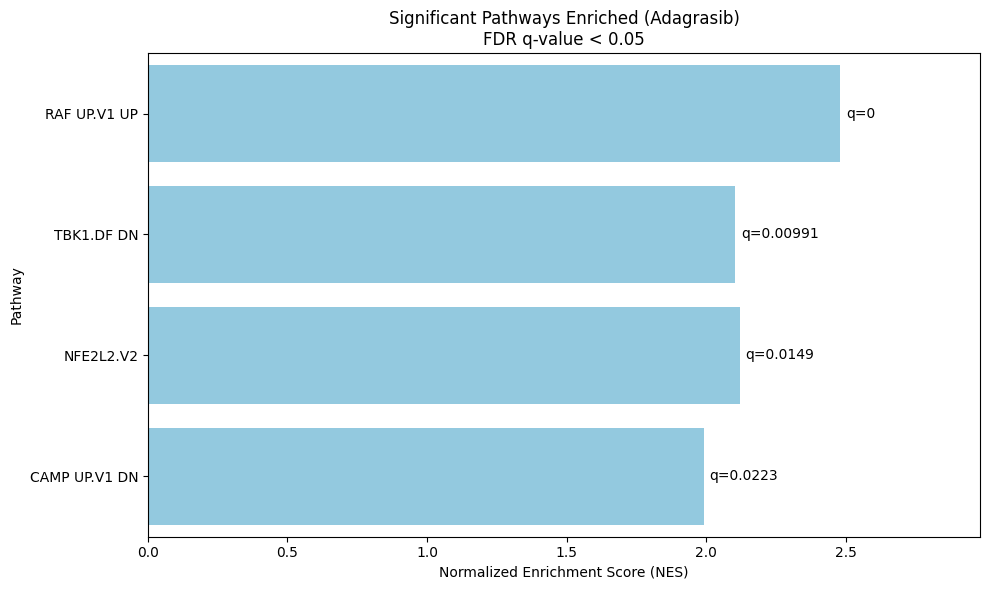

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter to remove q=0 and keep only significant pathways
filtered_results = pre_res.res2d[
    (pre_res.res2d["FDR q-val"] < 0.05)
]

#filtered_results = pre_res

# Sort by lowest q-value and get top 10 (or fewer if fewer significant pathways)
results = filtered_results.sort_values("FDR q-val", ascending=True).head(10)

# 👉 Print NES + pathway names
print("Significant pathways (FDR q-value < 0.05, q ≠ 0):")
print(results[['Term', 'NES', 'FDR q-val']])

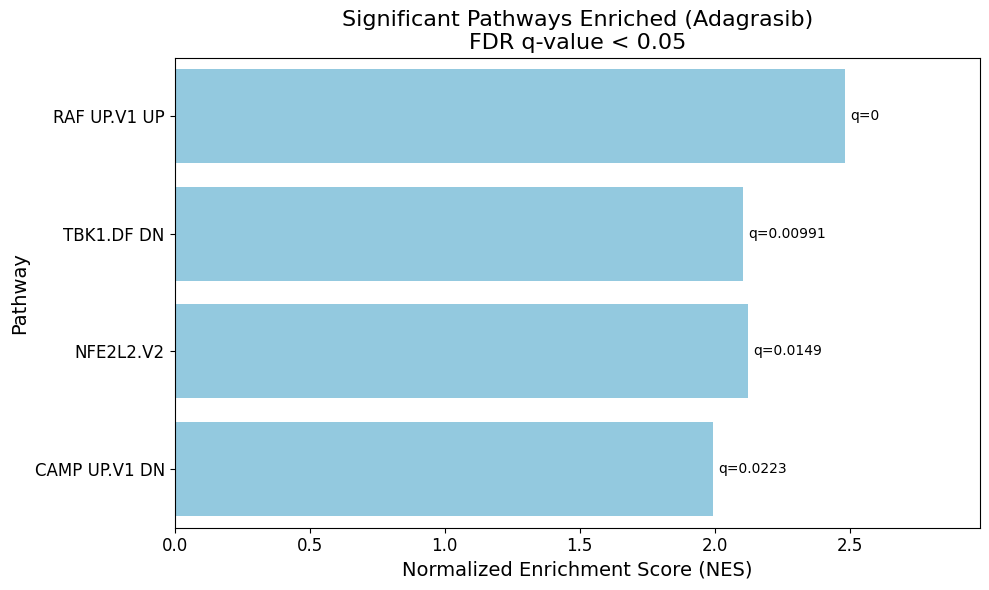

In [48]:
# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    y=results['Term'],
    x=results['NES'],
    color="skyblue"
)

# Add FDR q-value labels next to bars
for i, (nes, fdr) in enumerate(zip(results['NES'], results['FDR q-val'])):
    ax.text(
        nes + 0.02,
        i,
        f"q={fdr:.3g}",
        va='center',
        fontsize=10  # 👈 optional: make label text bigger
    )

# Beautify with bigger fonts
plt.xlabel("Normalized Enrichment Score (NES)", fontsize=14)   # 👈 bigger x-label
plt.ylabel("Pathway", fontsize=14)                             # 👈 bigger y-label
plt.title("Significant Pathways Enriched (Adagrasib)\nFDR q-value < 0.05", fontsize=16)  # 👈 bigger title
plt.xticks(fontsize=12)                                        # 👈 bigger x-tick labels
plt.yticks(fontsize=12)                                        # 👈 bigger y-tick labels
plt.xlim(min(0, results['NES'].min() - 0.5), results['NES'].max() + 0.5)
plt.tight_layout()
plt.show()
